In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret[full]

In [ ]:
# import pycaret as py
import pandas as pd
import numpy as np

In [ ]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')

In [ ]:
for columns in train:
    print(columns)

Store
Dept
Date
Weekly_Sales
IsHoliday


In [ ]:
tdf = train.merge(features, 'left').merge(stores, 'left') 

In [ ]:
tdf.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421560,45,98,2012-08-24,415.40,False,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,191.344887,8.684,B,118221
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221
421562,45,98,2012-09-07,352.44,True,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,B,118221
421563,45,98,2012-09-14,605.96,False,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,191.699850,8.684,B,118221
421564,45,98,2012-09-21,467.30,False,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,B,118221
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

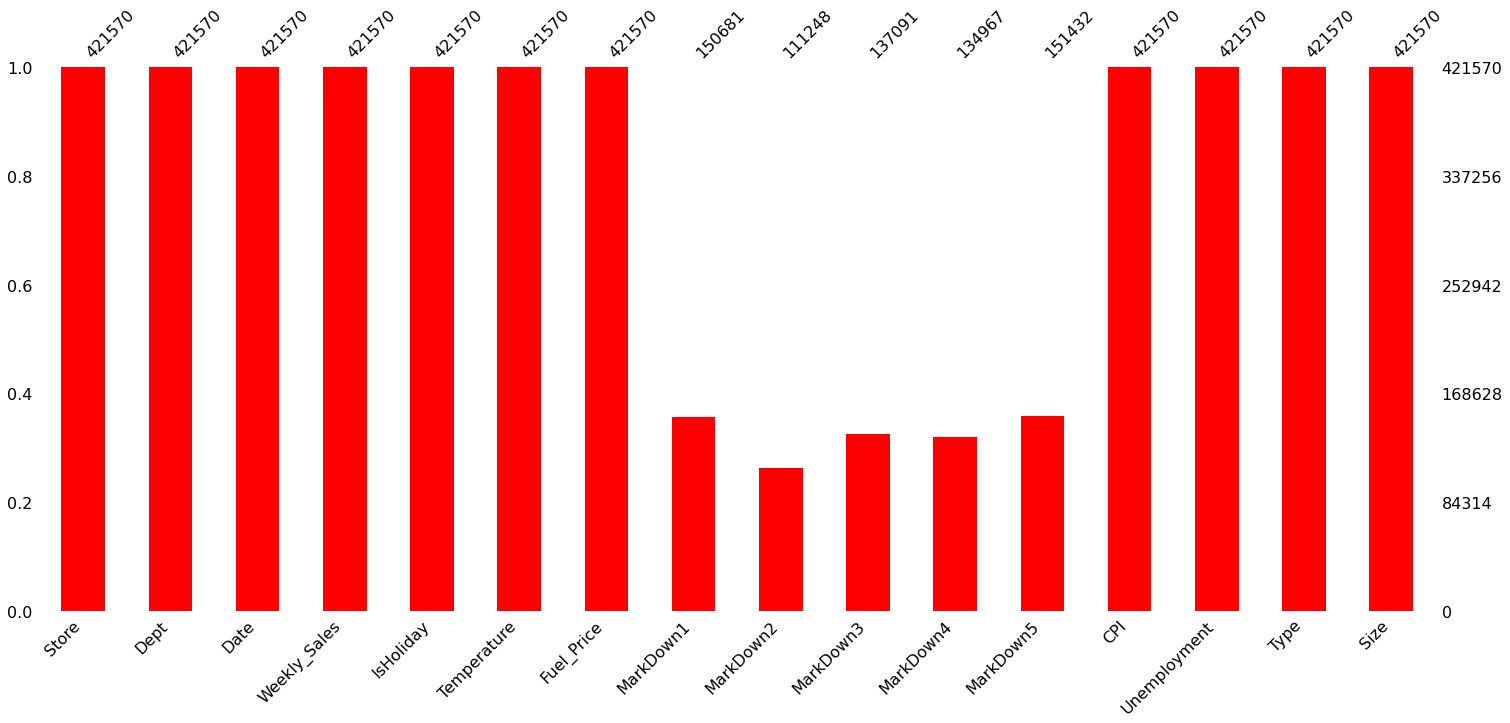

In [ ]:
msno.bar(tdf, color="red")
plt.show()

<AxesSubplot:>

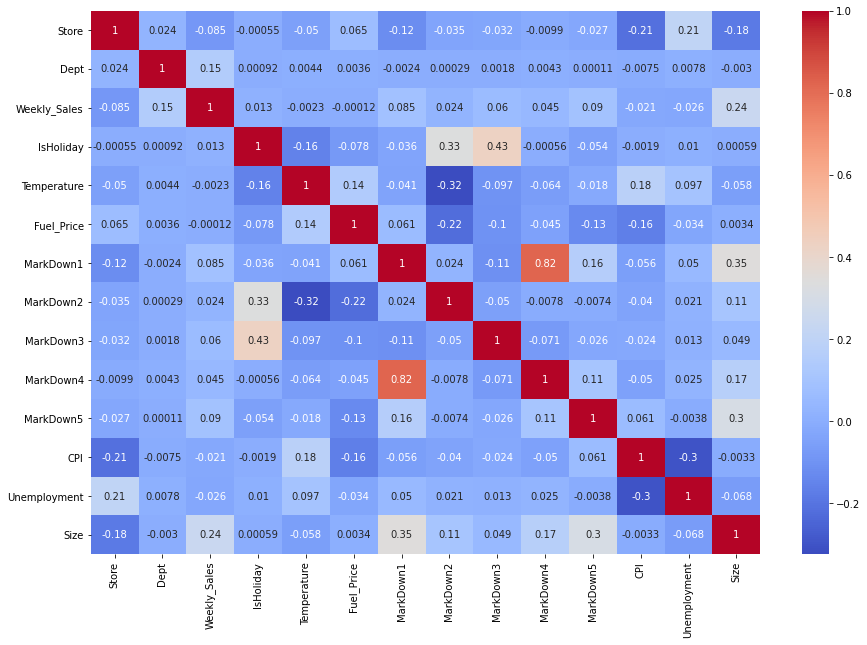

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(tdf.corr(), annot= True, cmap= 'coolwarm')

In [ ]:
import missingno as msno

<AxesSubplot:>

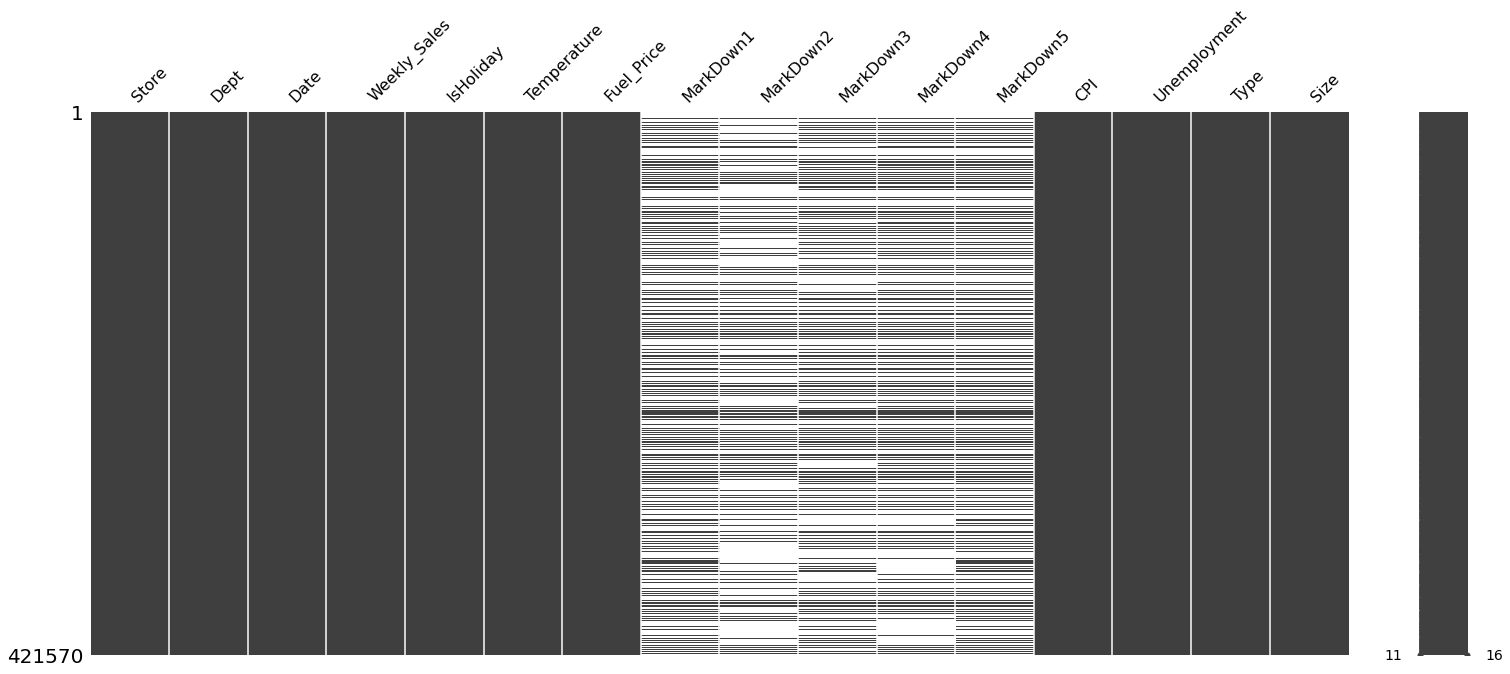

In [ ]:
msno.matrix(tdf)

In [ ]:
tdf.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
markdown1_mean=tdf['MarkDown1'].mean()
markdown1_mean

7246.420195910699

In [ ]:
markdown1_median=tdf['MarkDown1'].median()
markdown1_median

5347.45

In [ ]:
tdf['MarkDown1'].mode()

0      1.50
1    460.73
dtype: float64

In [ ]:
tdf['MarkDown1'].fillna(value=markdown1_mean, inplace=True)

In [ ]:
markdown2_mean=tdf['MarkDown2'].mean()
markdown2_mean

3334.628621098572

In [ ]:
markdown2_median=tdf['MarkDown2'].median()
markdown2_median

192.0

In [ ]:
tdf['MarkDown2'].fillna(value=markdown2_mean, inplace=True)

In [ ]:
markdown3_mean=tdf['MarkDown3'].mean()
markdown3_mean

1439.421384190147

In [ ]:
markdown3_median=tdf['MarkDown3'].median()
markdown3_median

24.6

In [ ]:
tdf['MarkDown3'].fillna(value=markdown3_mean, inplace=True)

In [ ]:
markdown4_mean=tdf['MarkDown4'].mean()
markdown4_mean

3383.1682560926743

In [ ]:
markdown4_median=tdf['MarkDown4'].median()
markdown4_median

1481.31

In [ ]:
tdf['MarkDown4'].fillna(value=markdown4_mean, inplace=True)

In [ ]:
markdown5_mean=tdf['MarkDown5'].mean()
markdown5_mean

4628.975079177479

In [ ]:
markdown5_median=tdf['MarkDown5'].median()
markdown5_median

3359.45

In [ ]:
tdf['MarkDown5'].fillna(value=markdown5_mean, inplace=True)

In [ ]:
tdf.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [ ]:
tdf['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
tdf['IsHoliday'].unique()

array([False,  True])

In [ ]:
tdf['IsHoliday']

0         False
1          True
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: IsHoliday, Length: 421570, dtype: bool

In [ ]:
tdf['IsHoliday'] = tdf['IsHoliday'].astype(int)

In [ ]:
tdf['Date'].unique()

array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

In [ ]:
tdf['IsHoliday']

0         0
1         1
2         0
3         0
4         0
         ..
421565    0
421566    0
421567    0
421568    0
421569    0
Name: IsHoliday, Length: 421570, dtype: int32

In [ ]:
tdf['Weekly_Sales']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [ ]:
tdf.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,A,151315


H:\AIML\AIML LAB\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


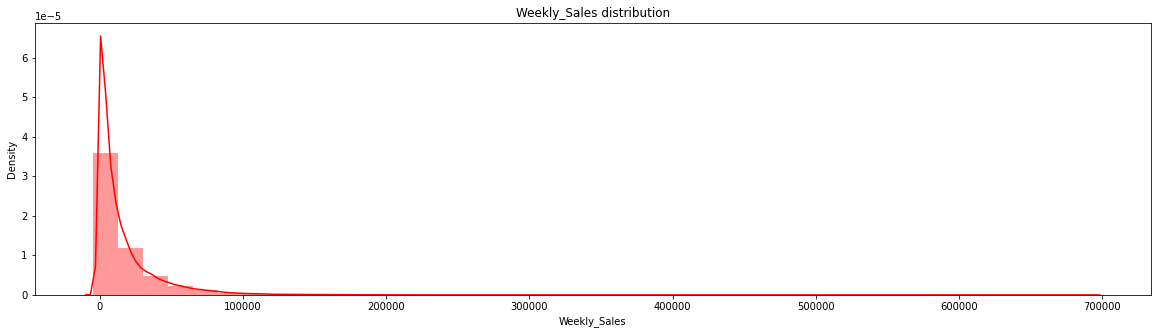

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(tdf['Weekly_Sales'], bins=40, kde=True, color='red')
plt.title('Weekly_Sales distribution')
plt.show()

In [ ]:
from pycaret.classification import *
clf1 = setup(data = tdf, target = 'IsHoliday', categorical_features= ['Type'],session_id=121)

,Description,Value
0,session_id,121
1,Target,IsHoliday
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(421570, 16)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3620
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.8980
et,Extra Trees Classifier,1.0000,1.0000,0.9998,1.0000,0.9999,0.9999,0.9999,5.0160
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.3470
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,20.7360
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,0.9983,1.0000,0.9991,0.9991,0.9991,1.2100
gbc,Gradient Boosting Classifier,0.9662,0.9931,0.5190,1.0000,0.6832,0.6673,0.7076,13.6740
knn,K Neighbors Classifier,0.9514,0.7251,0.3455,0.9016,0.4995,0.4792,0.5410,5.9490
ada,Ada Boost Classifier,0.9409,0.9605,0.2819,0.6982,0.4012,0.3759,0.4194,3.0460
lr,Logistic Regression,0.9396,0.6999,0.1483,0.9522,0.2566,0.2423,0.3629,5.4010


In [ ]:
best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=121, splitter='best')

In [ ]:
Decision_Tree = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
final_dt = finalize_model(Decision_Tree)

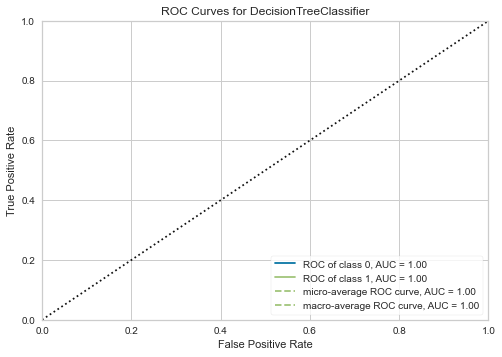

In [ ]:
plot_model(Decision_Tree, plot = 'auc')

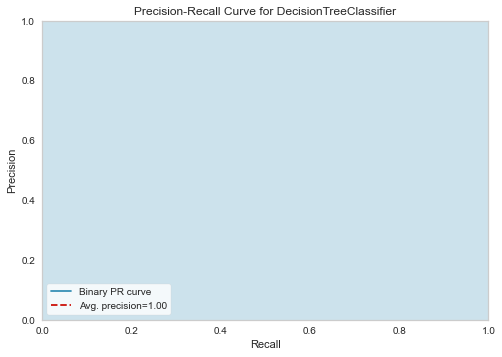

In [ ]:
plot_model(Decision_Tree, plot = 'pr')

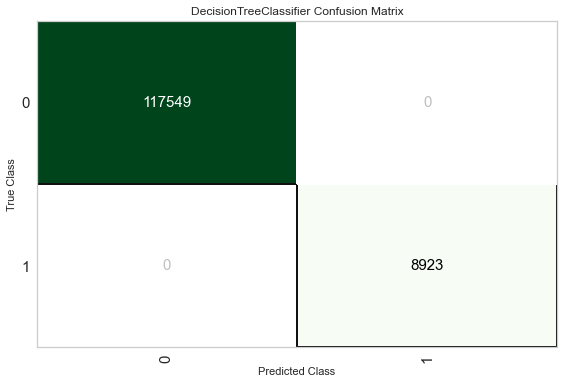

In [ ]:
plot_model(Decision_Tree, plot = 'confusion_matrix')

In [ ]:
tuned_gbc = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9728,0.9875,0.6225,0.9840,0.7626,0.7489,0.7710
1,0.9737,0.9881,0.6336,0.9880,0.7720,0.7588,0.7799
2,0.9738,0.9878,0.6307,0.9939,0.7717,0.7585,0.7807
3,0.9715,0.9874,0.6167,0.9653,0.7526,0.7382,0.7591
4,0.9748,0.9890,0.6606,0.9716,0.7865,0.7736,0.7899
5,0.9734,0.9883,0.6283,0.9901,0.7687,0.7554,0.7774
6,0.9723,0.9870,0.6119,0.9899,0.7563,0.7424,0.7666
7,0.9730,0.9876,0.6283,0.9797,0.7656,0.7519,0.7729
8,0.9733,0.9886,0.6218,0.9961,0.7657,0.7523,0.7759
9,0.9738,0.9879,0.6271,1.0000,0.7708,0.7577,0.7810


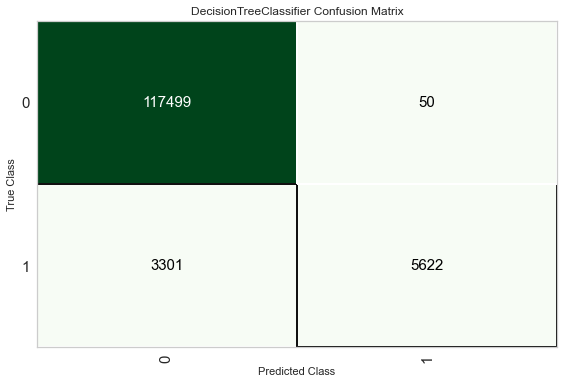

In [ ]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [ ]:
tdf.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Year'],
      dtype='object')

In [ ]:
tdf = train.merge(features, 'left').merge(stores, 'left') 

In [ ]:
from pycaret.regression import *
from datetime import datetime

tdf['IsHoliday'] = ["True" if i else 'False' for i in tdf['IsHoliday']]
tdf['DateTime'] = [datetime.strptime(i, '%Y-%m-%d') for i in tdf['Date']]
tdf['Month'] = [i.month for i in tdf['DateTime']]
tdf['Year'] = [i.year for i in tdf['DateTime']]
tdf.drop(['DateTime', 'Date'], axis = 1, inplace=True)
tdf


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2,2010
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2,2010
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2,2010
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9,2012
421566,45,98,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10,2012
421567,45,98,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,10,2012
421568,45,98,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,10,2012


In [ ]:
tdf.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [ ]:
setup_holiday = setup(data = tdf, target = 'Weekly_Sales', categorical_features= ['Type', 'IsHoliday'],ignore_features=['Size'], fold_strategy = 'timeseries', numeric_features = ['Year'], session_id=121, normalize = True)

,Description,Value
0,session_id,121
1,Target,Weekly_Sales
2,Original Data,"(421570, 17)"
3,Missing Values,True
4,Numeric Features,12
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(295098, 27)"


In [ ]:
best_model = compare_models(exclude=['et'])
# Decision_Tree = create_model('dt')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2047.5109,3.087596e+07,5522.2315,0.9404,0.6113,9.5185,132.967
xgboost,Extreme Gradient Boosting,3696.2240,4.678020e+07,6817.6162,0.9096,1.3693,73.2327,28.294
catboost,CatBoost Regressor,3937.8743,5.011894e+07,7062.1194,0.9031,1.4183,99.4507,33.341
dt,Decision Tree Regressor,2608.8600,5.461920e+07,7340.2771,0.8944,0.6167,6.3612,2.062
lightgbm,Light Gradient Boosting Machine,4563.8635,6.350696e+07,7956.8201,0.8772,1.4866,93.5801,1.633
gbr,Gradient Boosting Regressor,7377.0751,1.501761e+08,12249.2389,0.7094,1.7197,163.0791,26.889
knn,K Neighbors Regressor,12472.2329,4.076370e+08,20178.9184,0.2106,1.9457,681.5165,48.412
lr,Linear Regression,14818.3652,4.801689e+08,21911.1621,0.0702,2.2899,522.4473,0.460
lasso,Lasso Regression,14818.1786,4.801690e+08,21911.1645,0.0702,2.2899,522.5269,1.064
ridge,Ridge Regression,14818.3661,4.801689e+08,21911.1631,0.0702,2.2899,522.4481,0.066


In [ ]:
print(best_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=121, verbose=0, warm_start=False)


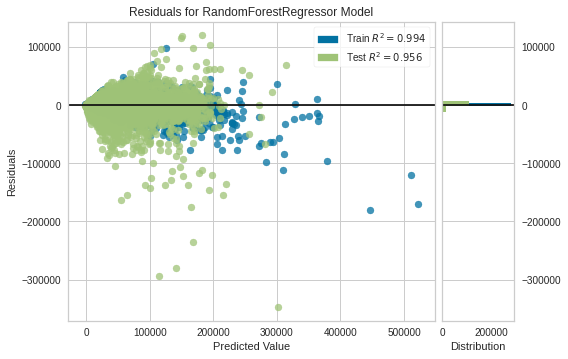

In [ ]:
plot_model(best_model)

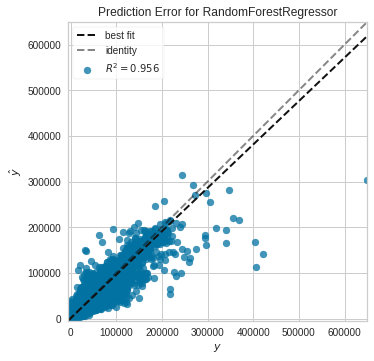

In [ ]:
plot_model(best_model, plot='error')

In [ ]:
predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1715.5984,2.282081e+07,4777.113,0.9555,0.4722,3.3255


,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Type_A,Type_B,Type_C,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Weekly_Sales,Label
0,1.001431,-1.090575,-0.726573,0.590159,1.767504e-08,1.080892e-08,-1.764839e-08,1.279395e-08,-4.859754e-08,-0.854341,0.314443,0.040152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11074.870117,11470.273828
1,-0.093728,1.565044,1.307947,-0.107994,-4.948652e-01,-6.742898e-01,-2.597000e-01,4.923720e-02,-7.672776e-02,1.286447,-0.748984,1.294794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23573.830078,23636.671934
2,0.532077,-0.664365,-1.320155,0.642520,1.701373e+00,-1.825787e-01,-2.607598e-01,3.918799e-01,-1.657790e-01,-0.868979,0.549748,1.294794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3855.149902,3077.201909
3,-0.719533,0.384769,0.318824,0.862875,3.199326e-01,-5.998715e-01,-2.615215e-01,3.285529e-02,4.847471e-01,-1.030812,-1.070585,1.294794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13110.959961,18076.656021
4,0.140949,-1.352858,-1.005237,1.441032,2.834513e+00,-4.393481e-01,-2.611039e-01,8.829721e+00,-1.921338e-01,-0.860296,0.373404,1.294794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9074.169922,9105.347993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126467,-0.484856,-1.156146,0.411351,-1.443211,1.767504e-08,1.080892e-08,-1.764839e-08,1.279395e-08,-4.859754e-08,0.470341,-0.586575,-1.214490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,48539.031250,45566.222627
126468,1.549011,1.532259,0.593159,-0.766875,1.767504e-08,1.080892e-08,-1.764839e-08,1.279395e-08,-4.859754e-08,-1.141599,0.557788,-1.214490,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42748.851562,42608.613945
126469,-1.501789,-0.205369,1.257625,-1.641748,1.767504e-08,1.080892e-08,-1.764839e-08,1.279395e-08,-4.859754e-08,1.107339,-0.330366,-1.214490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123556.421875,127016.744063
126470,-0.563082,-1.385644,-0.053450,-0.577065,1.767504e-08,1.080892e-08,-1.764839e-08,1.279395e-08,-4.859754e-08,-0.995226,0.119339,-1.214490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26086.189453,25984.808242


In [ ]:
tuned_rf = tune_model(best_model, n_iter = 50, fold = 3)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:44:15
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
save_model(best_model, 'rf_07aug')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Type'],
                                       display_types=True,
                                       features_todrop=['Size', 'IsHoliday'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Year'],
                                       target='Weekly_Sales',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_va...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        ma

In [ ]:
from pycaret.regression import *
model = load_model('rf_07aug')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
